# STACKOVERFLOW CHALLENGE
Tasks:
1) How many developer participated in the survey?
2) Find where the top 10 countries participating dev from?
3) How many are from Nigeria?
4) What's the average age the Nigerian dev wrote their first code?
5) What's the average age the Nigerian dev?
6) What are the  kinds of employment they are in?
7) What's the gender didtribution?
8) What major did they study in school?
9) What languages have they worked with?
10) What's the average number of language they have worked with?
11) What's the average nu,ber of years of experience of the Nigerian developer?

KICKER
1) How many devs are women, age below 25 and earn a living from dev?
2) What are the 10 most popular languages among Nigerian devs?

PS: Minus gender,ignore missing values in colunms in view.


In [54]:
import numpy as np
import pandas as pd
from statistics import mean
import math
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")
warnings.filterwarnings("ignore")

In [55]:
#load data
df = pd.read_csv(r"C:\\Users\\Uchenna\Desktop\\my work\\developer_survey_2020.zip (0)\\survey_results_public.csv")

In [56]:
#Number of rows and coulmns
df.shape

(64461, 61)

In [57]:
#display first 4 rows
df.head(4)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4


In [58]:
#Basic informatuon of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
Respondent                      64461 non-null int64
MainBranch                      64162 non-null object
Hobbyist                        64416 non-null object
Age                             45446 non-null float64
Age1stCode                      57900 non-null object
CompFreq                        40069 non-null object
CompTotal                       34826 non-null float64
ConvertedComp                   34756 non-null float64
Country                         64072 non-null object
CurrencyDesc                    45472 non-null object
CurrencySymbol                  45472 non-null object
DatabaseDesireNextYear          44070 non-null object
DatabaseWorkedWith              49537 non-null object
DevType                         49370 non-null object
EdLevel                         57431 non-null object
Employment                      63854 non-null object
Ethnicity                

In [59]:
#Check for missing values
df_missing = df.isnull().sum()
df_missing

Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64

In [60]:
# 1) How many developers participated
print('Toatal developers:', len(df['Respondent']))

Toatal developers: 64461


In [61]:
#Top 10 Countries participating
df['Country'].value_counts().nlargest(10).to_frame()

,Country
United States,12469
India,8403
United Kingdom,3896
Germany,3890
Canada,2191
France,1898
Brazil,1818
Netherlands,1343
Poland,1278
Australia,1208


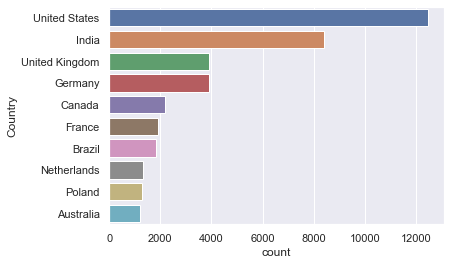

In [62]:
sns.countplot(y="Country", data=df, order =df['Country'].value_counts().nlargest(10).index)

In [63]:
#How many are from Nigeria?
df_developer_nig = df[df['Country'] == 'Nigeria']
print('Total number of developers from Nigeria:', len(df_developer_nig))

Total number of developers from Nigeria: 593


In [64]:
#What's the average age of the Nigerian developer wrote their first code?
# We have som NAN values qhich need to be dealt with
df_developer_nig_code = df_developer_nig['Age1stCode'].dropna()
df_developer_nig_code = df_developer_nig_code.astype(str).astype(int)
print("The average age the Nigerian dev wrote their first code:", math.floor(df_developer_nig_code.mean()))

The average age the Nigerian dev wrote their first code: 19


In [65]:
print('The average age of the Nigeria Dev is:', math.floor(df_developer_nig['Age'].mean()))

The average age of the Nigeria Dev is: 25


In [66]:
#What are the kinds of employment they are in?
df_developer_nig['Employment'].value_counts().to_frame()

,Employment
Employed full-time,187
Student,135
"Not employed, but looking for work",118
"Independent contractor, freelancer, or self-employed",109
Employed part-time,36
"Not employed, and not looking for work",4


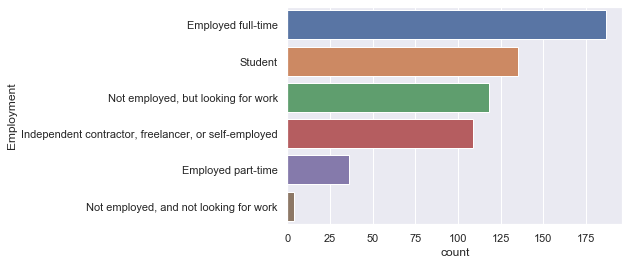

In [67]:
sns.countplot(y="Employment", data=df_developer_nig, order = df_developer_nig['Employment'].value_counts().index)

In [70]:
#What is the gender diatribution?
df_developer_nig['Gender'].fillna('Man', inplace = True)
df_developer_nig['Gender'].value_counts()

Man                                                  559
Woman                                                 31
Woman;Man                                              2
Non-binary, genderqueer, or gender non-conforming      1
Name: Gender, dtype: int64

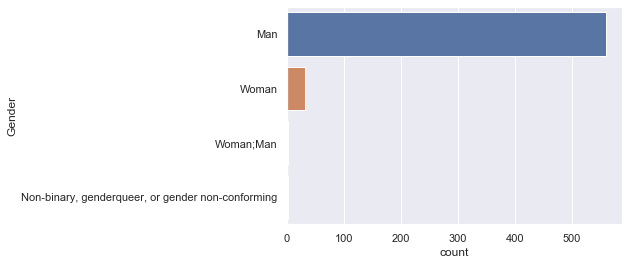

In [71]:
sns.countplot(y="Gender", data=df_developer_nig, order = df_developer_nig['Gender'].value_counts().index)

In [73]:
#What Majors did they study in school?
df_developer_nig["UndergradMajor"].value_counts().to_frame()

,UndergradMajor
"Computer science, computer engineering, or software engineering",192
"Another engineering discipline (such as civil, electrical, mechanical, etc.)",62
"A natural science (such as biology, chemistry, physics, etc.)",32
Mathematics or statistics,24
"Information systems, information technology, or system administration",23
"A business discipline (such as accounting, finance, marketing, etc.)",18
"A health science (such as nursing, pharmacy, radiology, etc.)",10
"A social science (such as anthropology, psychology, political science, etc.)",9
"A humanities discipline (such as literature, history, philosophy, etc.)",9
Web development or web design,8


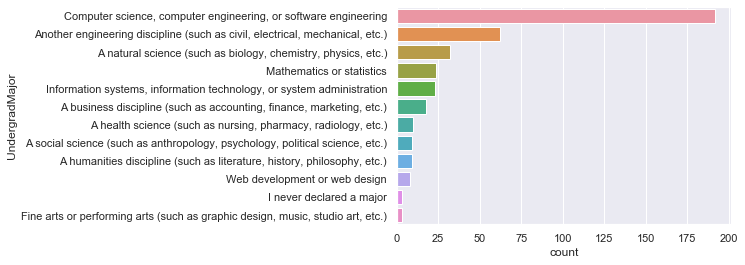

In [78]:
sns.countplot(y="UndergradMajor", data=df_developer_nig, order = df_developer_nig['UndergradMajor'].value_counts().index)

In [82]:
 #What Languages have they worked with?
df_developer_nig_lang = df_developer_nig['LanguageWorkedWith'] 
data = df_developer_nig_lang.str.split(";", expand = True)

ValueError: too many values to unpack (expected 2)

In [86]:
 data.value_counts().to_frame()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [85]:
#Kickers<
#How many devs are women, age below 25 and earn a living feom dev?
print("Total number of women devs age below 25 and earn living from dev:", len(df.loc[(df["Gender"] == 'Woman') & (df["Age"]<=25) & (df['CompTotal']>=1.0)]))

Total number of women devs age below 25 and earn living from dev: 496


In [87]:
#What are the 10 most popular language among Nigerian devs
data.value_counts().nlargest(10).to_frame()

AttributeError: 'DataFrame' object has no attribute 'value_counts'